## 6.2 라이브러리 및 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data = pd.read_csv(file_url)

## 6.3 데이터 확인하기

In [ ]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

- 모두 숫자로 된 변수이기 때문에 Dtype은 int형 아니면 float형
- 결측치가 있는 변수
> alcohol : 2개 <br>
> nonlfavanoid_phenols : 3개


In [ ]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


통계적 정보 중 count를 살펴보면 결측치의 존재를 다시 확인할 수 있다.

## 6.4 목푯값에서 고윳값 확인하기

In [ ]:
data['class'].unique() # 목표 변수의 고윳값 출력

array([0, 1, 2])

In [ ]:
data['class'].nunique() # 고윳값 가짓수 출력

3

In [ ]:
data['class'].value_counts() # 각 고윳값에 해당하는 개수 출력

,count
class,
1,71
0,59
2,48


- value_counts() 함수를 가장 먼저 확인했다면 고유값이 3개이고, 각각 몇 개씩인지도 단번에 확인 가능
- 목적에 따라 필요한 함수만 사용

<Axes: xlabel='class', ylabel='count'>

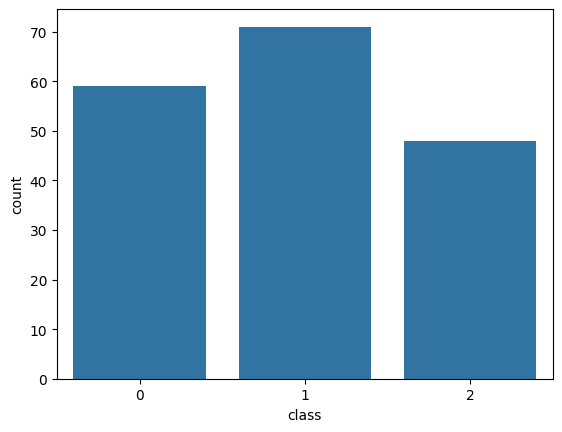

In [ ]:
sns.barplot(x = data['class'].value_counts().index, y = data['class'].value_counts())

- value_counts() 함수의 결괏값 : 한 열짜리 데이터인 판다스 시리즈 형태
- class라는 변수의 값(0, 1, 2)을 x축으로, 각 클래스에 해당하는 값의 개수(59, 71, 48)를 y축으로 보내주면 됨.

In [ ]:
data['class'].value_counts().index

Index([1, 0, 2], dtype='int64', name='class')

판다스 시리즈나 데이터 프레임에 .index를 사용하면 인덱스만을 따로 뽑아낼 수 있음

<Axes: ylabel='count'>

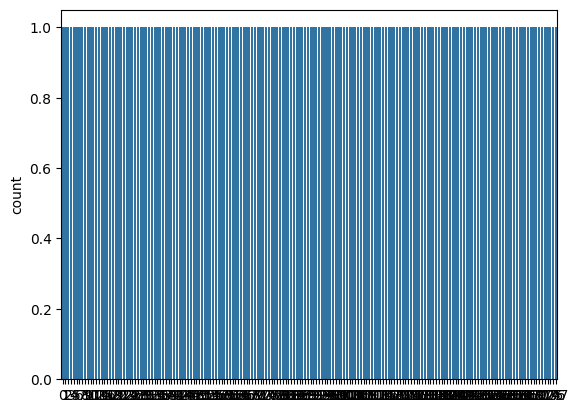

In [ ]:
sns.countplot(data['class'])

## 6.5 전처리 : 결측치 처리하기


In [ ]:
data.isna()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.sum()

,0
alcohol,2312.180000
malic_acid,415.870000
ash,421.240000
alcalinity_of_ash,3470.100000
magnesium,17754.000000
total_phenols,408.530000
flavanoids,361.210000
nonflavanoid_phenols,64.390000
proanthocyanins,283.180000
color_intensity,900.339999


In [ ]:
data.mean()

,0
alcohol,12.989091
malic_acid,2.336348
ash,2.366517
alcalinity_of_ash,19.494944
magnesium,99.741573
total_phenols,2.295112
flavanoids,2.029270
nonflavanoid_phenols,0.362370
proanthocyanins,1.590899
color_intensity,5.058090


In [ ]:
data.isna().sum()

,0
alcohol,2
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,5
proanthocyanins,0
color_intensity,0


In [ ]:
data.isna().mean()

,0
alcohol,0.011236
malic_acid,0.000000
ash,0.000000
alcalinity_of_ash,0.000000
magnesium,0.000000
total_phenols,0.000000
flavanoids,0.000000
nonflavanoid_phenols,0.028090
proanthocyanins,0.000000
color_intensity,0.000000


### 6.5.2 결측치를 처리하는 방법

방법1) 결측치 행 제거하기

In [ ]:
data.dropna()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


178rows 중에 7개의 열이 삭제된 것을 알 수 있음

In [ ]:
data.dropna().isna().mean()

,0
alcohol,0.0
malic_acid,0.0
ash,0.0
alcalinity_of_ash,0.0
magnesium,0.0
total_phenols,0.0
flavanoids,0.0
nonflavanoid_phenols,0.0
proanthocyanins,0.0
color_intensity,0.0


In [ ]:
# 결괏값으로 업데이트하는 방법
# data = data.dropna()
# data.dropna(inplace = True)

In [ ]:
data.dropna(subset=['alcohol']) # 지정된 변수의 결측치 행만 제거하기

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.05,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [ ]:
data.dropna(subset=['alcohol']).isna().mean()

,0
alcohol,0.0
malic_acid,0.0
ash,0.0
alcalinity_of_ash,0.0
magnesium,0.0
total_phenols,0.0
flavanoids,0.0
nonflavanoid_phenols,0.0
proanthocyanins,0.0
color_intensity,0.0


방법 2 ) 결측 변수 제거하기 : drop()

In [ ]:
data.drop(['alcohol','nonflavanoid_phenols'], axis = 1)

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.71,2.43,15.6,127,2.80,3.06,2.29,5.64,1.04,3.92,1065,0
1,1.78,2.14,11.2,100,2.65,2.76,1.28,4.38,1.05,3.40,1050,0
2,2.36,2.67,18.6,101,2.80,3.24,2.81,5.68,1.03,3.17,1185,0
3,1.95,2.50,16.8,113,3.85,3.49,2.18,7.80,0.86,3.45,1480,0
4,2.59,2.87,21.0,118,2.80,2.69,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,1.06,7.70,0.64,1.74,740,2
174,3.91,2.48,23.0,102,1.80,0.75,1.41,7.30,0.70,1.56,750,2
175,4.28,2.26,20.0,120,1.59,0.69,1.35,10.20,0.59,1.56,835,2
176,2.59,2.37,20.0,120,1.65,0.68,1.46,9.30,0.60,1.62,840,2


방법 3 ) 결측값 채우기 : fillna()

In [ ]:
data.fillna(-99)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,-99.00,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [ ]:
data.fillna(data.mean())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.230000,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,12.989091,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.160000,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.370000,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.240000,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.400000,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.270000,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.170000,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


### 6.5.3 결측치 처리 방식 선택하기
> 50% 이상이면 drop을 고려, 70-80% 이상이면 가급적 drop() 적용. 그러나 90% 이상이 결측치라고 해도, 해당 변수가 프로젝트에서 매우 중요한 역할을 할 거라 예상될 경우 어떻게든 활용 방법을 찾자

### 6.5.4 결측치 처리하기

In [ ]:
data.fillna(data.median(), inplace= True)

In [ ]:
data.isna().mean()

,0
alcohol,0.0
malic_acid,0.0
ash,0.0
alcalinity_of_ash,0.0
magnesium,0.0
total_phenols,0.0
flavanoids,0.0
nonflavanoid_phenols,0.0
proanthocyanins,0.0
color_intensity,0.0


## 6.6 스케일링

- 두 값에서 1이라는 값이 차지하는 의미가 다르기에 필요
- 종류 : 표준화 스케일링, 로버스트 스케일링, 최소-최대 스케일링, 정규화 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # 한 라이브러리에서 여러 모듈 임포트

### 6.6.1 표준화 스케일링

In [ ]:
st_scaler = StandardScaler() # 스케일러 지정

In [ ]:
st_scaler.fit(data) # 학습

StandardScaler()

In [ ]:
st_scaled = st_scaler.transform(data) # 학습에서 얻은 정보 계산

transform() : 스케일러가 fit()을 통해 학습한 정보를 통해 데이터를 변환, 즉 스케일링하는 함수

In [ ]:
st_scaled

array([[ 1.55484903, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.07550273, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.21340789,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.35131305,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.22594472,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.4294807 ,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [ ]:
pd.DataFrame(st_scaled) # 보기 편해졌으나, 칼럼명이 숫자로 바뀜

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [ ]:
st_scaled = pd.DataFrame(st_scaled, columns = data.columns) # 컬럼명을 지정하여 데이터 프레임으로 변환

In [ ]:
round(st_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.46,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49,-1.21
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78,-1.21
50%,0.08,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23,0.08
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76,1.37
max,2.21,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97,1.37


#### 이해하기
> 표준화 스케일링 : 데이터를 표준화된 정규분포로 만들어주는 방법. <br>
공식 : $\frac{x_i - \text{mean}(x)}{\text{sd}(x)}$


### 6.6.2 로버스트 스케일링

In [ ]:
rb_scaler = RobustScaler() # 로버스트 스케일링에 사용할 객체를 생성

In [ ]:
rb_scaled = rb_scaler.fit_transform(data) # 로버스트 스케일링
rb_scaled = pd.DataFrame(rb_scaled, columns = data.columns) # 데이터프레임으로 변형

In [ ]:
round(rb_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.05,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15,-0.03
std,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65,0.39
min,-1.55,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82,-0.50
25%,-0.53,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36,-0.50
50%,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64,0.50
max,1.31,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08,0.50


#### 이해하기
> 로버스트 스케일링 : 사분위값을 이용하여 계산 <br>
공식 : $\frac{x_i - Q_2(x)}{Q_3(x) - Q_1(x)}$ <br>
평균값 : 0에 가깝지만 완전히 0은 아님, 분산 : 1로 고정되지 않음


### 6.6.3 최소-최대 스케일링

In [ ]:
mm_scaler = MinMaxScaler() # 최소-최대 스케일링 객체 생성
mm_scaled = mm_scaler.fit_transform(data) # 최소-최대 스케일링
mm_scaled = pd.DataFrame(mm_scaled, columns = data.columns) # 데이터프레임으로 변형
round(mm_scaled.describe(), 2) # 소수점 2째 자리까지 출력

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.53,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33,0.47
std,0.22,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.17,0.45,0.34,0.20,0.26,0.18,0.26,0.26,0.17,0.25,0.24,0.16,0.00
50%,0.54,0.22,0.53,0.46,0.30,0.47,0.38,0.40,0.36,0.29,0.39,0.55,0.28,0.50
75%,0.71,0.46,0.64,0.56,0.40,0.63,0.53,0.58,0.49,0.42,0.52,0.70,0.50,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### 이해하기
> 특징 : 모든 컬럼에서 최댓값이 1, 최솟값이 0인 형태로 변환됨 <br>
수식 : $\frac{x_i - min(x)}{max(x) - min(x)}$

### 6.6.4 스케일링 방식 선택하기

1.   표준화 스케일링
> 데이터에 아웃라이어가 존재할 때 아웃라이어의 영향을 받음. 평균 0, 분산 1이 되게끔 분포시키기 때문에, 데이터의 기존 분포 형태가 사라지고 정규분포를 따르는 결과물을 가져옴
2.   로버스트 스케일링
> 데이터에 아웃라이어가 존재할 때, 아웃라이어의 영향을 받지 않음. 변환된 데이터의 범위는 표준화 스케일이나 최소-최대 스케일링보다 넓게 나타남
3.   최소-최대 스케일링
> 표준화 스케일링과 마찬가지로 아웃라이어의 영향을 받게 됨. 위의 두 스케일러와 비교했을 때, 데이터의 기존 분포를 가장 있는 그대로 담아내며 스케일만 변화시킴. 데이터의 범위는 0~1로 나타남.


**주의할 점**
- 스케일링 대상에서 종속변수를 제외
- 스케일링 전에 훈련셋과 시험셋을 나눠야 함

### 6.6.5 스케일링 적용하기

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1),data['class'], test_size=0.2, random_state=100)

In [ ]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
mm_scaler = MinMaxScaler() # 최대-최소 스케일러 객체 생성
mm_scaler.fit(X_train) # 학습

MinMaxScaler()

In [ ]:
X_train_scaled = mm_scaler.transform(X_train) # 학습셋 트랜스폼
X_test_scaled = mm_scaler.transform(X_test) # 시험셋 트랜스폼

In [ ]:
mm_scaler = MinMaxScaler() # 최대-최소 스케일러 객체 생성
X_train_scaled = mm_scaler.fit_transform(X_train) # 학습셋 학습 빛 트랜스폼
X_test_scaled = mm_scaler.transform(X_test) # 시험셋 학습 및 트랜스폼, fit()과정을 다시 거칠 필요 없어 바로 transfrom()을 사용해 X_test를 스케일링

fit_transform()함수 : fit()과 transform()을 동시에 처리해 fit()으로 학습된 정보를 mm_scaler에 저장

## 6.7 모델링 및 예측/평가하기

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier() # KNN 모델 생성
knn.fit(X_train_scaled,y_train) # 학습
pred = knn.predict(X_test_scaled) # 예측

KNeighborsClassifier()함수를 호출해 알고리즘의 속성을 KNN으로 부여, fit()으로 학습시킨 후에 predict()로 예측까지 완료

In [ ]:
pred

array([1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2])

알고있는 정답인 y_test와 예측값인 pred가 얼마나 일치하는지 accuracy_score()를 사용해 확인

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8888888888888888

약 89%의 정확도. 괜찮은 수준의 예측

## 6.8 하이퍼 파라미터 튜닝하기

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9166666666666666

**KNeighborsClassifier()**
KNN은 분류와 회귀 문제 모두 지원. KNeighborsClassifier는 분류 문제를 위한 알고리즘.

- 주요 파라미터 <br>
> n_neighbors=5 : 예측에 참고할 이웃 수 <br>
> weights='univorm' : 예측에 사용되는 가중치 함수로 기본값인 uniform은 모든 포인트에 동일한 가중치가 부여됨 <br>
> metric = 'minkowski' : 거리 측정 기준 <br>
> n_jobs=None : 실행할 병렬 작업 수


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.8888888888888888

약 89%로 기본값 5일 때와 같은 결과. n_neighbor에 들어가는 숫자가 달라지면 예측 결과 또한 달라질 수 있음. 일일이 수작업으로 확인하는 방법은 매우 번거롭기 때문에 적당한 범위에서 반복되도록 프로그램을 수정

In [ ]:
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred = knn.predict(X_test_scaled)
    print(accuracy_score(y_test, pred))

0.9166666666666666
0.8888888888888888
0.8888888888888888
0.9166666666666666
0.8888888888888888
0.9166666666666666
0.9166666666666666
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.9166666666666666
0.9166666666666666
0.9722222222222222
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9166666666666666
0.9722222222222222
0.9444444444444444
0.9722222222222222


for문을 사용하여 20번 반복한다.


1.   n_neighbors가 i로 지정되어 있기 때문에 해당 코드를 실행하면 매개변수가 1부터 20까지 총 20번의 모델링을 거치게 됨
2.   마지막에서 각 정확도를 출력



In [ ]:
scores = [ ] # 빈 리스트 생성

In [ ]:
for i in range(1, 21): # 1부터 20까지 반복
    knn = KNeighborsClassifier(n_neighbors=i) # KNN 모델 생성
    knn.fit(X_train_scaled,y_train) # 학습
    pred = knn.predict(X_test_scaled) # 예측
    acc = accuracy_score(y_test, pred) # 정확도 계산
    scores.append(acc) # 정확도 저장

In [ ]:
scores

[0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9722222222222222]

<Axes: >

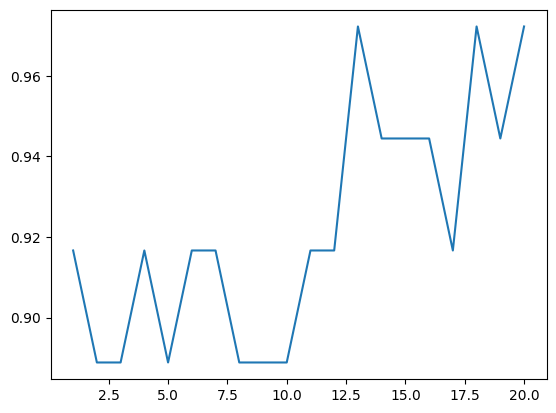

In [ ]:
sns.lineplot(x=range(1,21), y=scores)

매개변수 값이 클수록 더 나은 예측을 보여주지만, 13 이후로는 딱히 더 나은 개선은 보이지 않음. 결과가 같다면 연산을 더 많이 하는 더 큰 값을 매개변수로 사용할 필요는 보이지 않음. **따라서 13이 합리적인 선택**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13) # 위의 결과를 통해 n_neighbors를 13으로 지정
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9722222222222222

## 6.9 이해하기 : K-최근접 이웃

### 6.9.1 거리 기반의 의미 파악하기
모호함을 정리하는 데 특정 이웃의 개수를 지정하여 판단
> 인접한 도형 3개는 1,2,3번 <br>
> 인접한 이웃 하나만으로 판단하면 가장 가까운 이웃은 원이기에 c를 원으로 판단. <br>
> 인접한 이웃 2개로 고려한다면 동점 -> 이럴 경우 랜덤으로 분류

**n_neighbors** : 판단에 반영할 가까운 이웃 수

### 6.9.2 스케일링
x축과 y축을 벌렸을 때 그 중요성을 파악할 수 있음.
KNN에서는 각 변수의 스케일이 매우 중요


### 6.9.3 동점일 때 처리


1.   고려할 이웃의 수를 항상 홀수로 유지. 홀수 개의 이웃만 고려한다면 동점 문제를 해결할 수 있음
2.   가중치를 줌. KNN에서는 weights라는 매개변수가 있는데, 이를 이용하면 동점일 때 그 거리가 더 가까운 쪽으로 결정하도록 설정 가능



### 6.9.4 K-최근접 이웃 알고리즘의 계산 특징
- K-최근점 이웃은 예측할 데이터와 기존 데이터의 거리만 계산하면 되기 때문에, 모델링에서 fit() 과정은 기존의 데이터 위치를 스크린샷하는 정도일뿐. 별다른 학습x
- fit()은 순식간에 끝나지만 데이터 규모가 클 때는 predict()에서 상당한 시간이 걸릴 수도 있음

## 질문
- sns.countplot(data['class'])을 돌리고 난 결과를 보니 교재와 다르고 오류가 난 것 같은데 그 원인을 모르겠다.